In [ ]:
from numpy import mean
from numpy import std
import time
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
dfx = pd.read_csv("X_ReSampled.csv")
dfy = pd.read_csv("Y_ReSampled.csv")
UserF = dfx[['UCcounts','avg_Urating','Uavg#word','day_rating']].copy()
scoring = {'Acc': 'accuracy',
           'AP': 'average_precision',
           'AUC': 'roc_auc',
           'F1': 'f1',
           'log loss': 'neg_log_loss'} 
clf1 = XGBClassifier(random_state = 44, nthread = 4)
clf2 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf3 = GaussianNB()
clf4 = RandomForestClassifier(random_state = 44,n_jobs = -1)
clf5 = LogisticRegression(random_state = 44,n_jobs = -1)
eclf = StackingClassifier(estimators=[clf1, clf2, clf3,clf4,clf5], final_estimator=LogisticRegression(), n_jobs = -1)
labels = ['XGBoost','KNN Classifier', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'Stacking']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=,n_jobs=-1)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))
    end = time.time()
    print(label, end-start)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

In [1]:
from numpy import mean
from numpy import std
import time
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
scoring = {'Acc': 'accuracy',
           'AP': 'average_precision',
           'recall': 'recall',
           'AUC': 'roc_auc',
           'F1': 'f1',
           'log loss': 'neg_log_loss'} 

In [10]:
estimators = [
    ('xgb', XGBClassifier(random_state = 44, nthread = 4)),
    ('knn3', KNeighborsClassifier(n_neighbors=3, n_jobs = -1)),
    ('gnb', GaussianNB()),
    ('rf', RandomForestClassifier(random_state = 44,n_jobs = -1)),
    ('lr', LogisticRegression(random_state = 44,n_jobs = -1))]
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(), n_jobs = -1)
from sklearn.model_selection import cross_val_score
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    scores = cross_val_score(clf, UserF, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (label, scores.mean()*100, scores.std()*100))


Accuracy XGBoost: 74.99 (+/- 1.04)
Accuracy KNN Classifier: 71.57 (+/- 1.13)
Accuracy Naive Bayes: 65.31 (+/- 0.31)
Accuracy Random Forest: 76.14 (+/- 1.07)
Accuracy Logistic Regression: 71.30 (+/- 0.74)
Accuracy Stacking: 77.02 (+/- 1.01)


In [9]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5], weights=[1,1,1,1,1])
from sklearn.model_selection import cross_val_score
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    scores = cross_val_score(clf, UserF, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1,return_train_score=True)
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (label, scores.mean()*100, scores.std()*100))


Accuracy XGBoost: 74.99 (+/- 1.04)
Accuracy KNN Classifier: 71.57 (+/- 1.13)
Accuracy Naive Bayes: 65.31 (+/- 0.31)
Accuracy Random Forest: 76.14 (+/- 1.07)
Accuracy Logistic Regression: 71.30 (+/- 0.74)
Accuracy Stacking: 75.29 (+/- 0.87)


In [11]:
estimators = [
    ('xgb', XGBClassifier(random_state = 44, nthread = 4)),
    ('knn3', KNeighborsClassifier(n_neighbors=3, n_jobs = -1)),
    ('gnb', GaussianNB()),
    ('rf', RandomForestClassifier(random_state = 44,n_jobs = -1)),
    ('lr', LogisticRegression(random_state = 44,n_jobs = -1))]
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(), n_jobs = -1, passthrough=True)
from sklearn.model_selection import cross_val_score
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    scores = cross_val_score(clf, UserF, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (label, scores.mean()*100, scores.std()*100))


Accuracy XGBoost: 74.99 (+/- 1.04)
Accuracy KNN Classifier: 71.57 (+/- 1.13)
Accuracy Naive Bayes: 65.31 (+/- 0.31)
Accuracy Random Forest: 76.14 (+/- 1.07)
Accuracy Logistic Regression: 71.30 (+/- 0.74)
Accuracy Stacking: 77.10 (+/- 1.03)


In [50]:
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(), n_jobs = -1, passthrough=False)
from sklearn.model_selection import cross_val_score
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    scores = cross_val_score(clf, UserF, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (label, scores.mean()*100, scores.std()*100))


Accuracy XGBoost: 75.43 (+/- 0.95)
Accuracy GNB: 65.76 (+/- 0.40)
Accuracy KNN: 74.69 (+/- 3.60)
Accuracy Random Forest: 76.08 (+/- 1.38)
Accuracy Logistic Regression: 69.23 (+/- 2.91)
Accuracy Voting: 83.22 (+/- 1.40)


In [49]:
from sklearn.neural_network import MLPClassifier
clf1 = XGBClassifier(random_state = 44, nthread = 4)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf4 = RandomForestClassifier(random_state = 44,n_jobs = -1)
clf5 = LogisticRegression(random_state = 44,n_jobs = -1)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5], weights=[1,1,1,1,1] )    

labels = ['XGBoost','GNB', 'KNN', 'Random Forest', 'Logistic Regression', 'Voting']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=scoring,n_jobs=-1,return_train_score=True)
    end = time.time()
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

XGBoost
GNB
KNN
Random Forest
Logistic Regression
Voting


,XGBoost,GNB,KNN,Random Forest,Logistic Regression,Voting
fit_time,5.871124,0.096105,1.290606,30.606854,1.481505,42.299733
score_time,0.228420,0.119995,2.538055,3.154958,0.109784,5.901028
test_Acc,0.754253,0.657626,0.746950,0.760822,0.692286,0.787444
train_Acc,0.759042,0.657923,0.943116,0.996549,0.696587,0.834947
test_AP,0.850660,0.772365,0.774099,0.871102,0.782266,0.907127
train_AP,0.857444,0.771938,0.984835,0.999841,0.782606,0.989501
test_recall,0.672435,0.357956,0.853643,0.754171,0.610690,0.652596
train_recall,0.673372,0.358156,0.922232,0.997412,0.610303,0.700841
test_AUC,0.819272,0.739288,0.824003,0.841168,0.750070,0.880255
train_AUC,0.829304,0.739668,0.990274,0.999845,0.750885,0.990520


In [51]:
from sklearn.neural_network import MLPClassifier
clf1 = XGBClassifier(random_state = 44, nthread = 4)
clf2 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=21,tol=0.000001)
clf3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf4 = RandomForestClassifier(random_state = 44,n_jobs = -1)
clf5 = LogisticRegression(random_state = 44,n_jobs = -1)
estimators = [
    ('xgb', XGBClassifier(random_state = 44, nthread = 4)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                          solver='adam', verbose=1,  random_state=21,tol=0.000001)),
    ('knn3', KNeighborsClassifier(n_neighbors=3, n_jobs = -1)),
    ('rf', RandomForestClassifier(random_state = 44,n_jobs = -1)),
    ('lr', LogisticRegression(random_state = 44,n_jobs = -1))]
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(), n_jobs = -1, passthrough=False)
labels = ['XGBoost','MLP Classifier', 'KNN', 'Random Forest', 'Logistic Regression', 'Stacking']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=scoring,n_jobs=-1,return_train_score=True)
    end = time.time()
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

XGBoost
MLP Classifier
KNN
Random Forest
Logistic Regression
Stacking


,XGBoost,MLP Classifier,KNN,Random Forest,Logistic Regression,Stacking
fit_time,5.584847,135.797873,1.223761,30.590641,1.413201,979.590659
score_time,0.253681,4.179441,2.460212,3.153895,0.109669,4.448788
test_Acc,0.754253,0.524545,0.746950,0.760822,0.692286,0.832227
train_Acc,0.759042,0.525881,0.943116,0.996549,0.696587,0.918039
test_AP,0.850660,0.525744,0.774099,0.871102,0.782266,0.925321
train_AP,0.857444,0.527609,0.984835,0.999841,0.782606,0.991127
test_recall,0.672435,0.463445,0.853643,0.754171,0.610690,0.786767
train_recall,0.673372,0.464149,0.922232,0.997412,0.610303,0.841285
test_AUC,0.819272,0.525421,0.824003,0.841168,0.750070,0.909265
train_AUC,0.829304,0.526867,0.990274,0.999845,0.750885,0.989615


In [2]:
# with Random Forest as meta learner
clf1 = XGBClassifier(random_state = 44, nthread = 4)
clf2 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=21,tol=0.000001)
clf3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf4 = RandomForestClassifier(random_state = 44,n_jobs = -1)
clf5 = LogisticRegression(random_state = 44,n_jobs = -1)
estimators = [
    ('xgb', XGBClassifier(random_state = 44, nthread = 4)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                          solver='adam', verbose=1,  random_state=21,tol=0.000001)),
    ('knn3', KNeighborsClassifier(n_neighbors=3, n_jobs = -1)),
    ('rf', RandomForestClassifier(random_state = 44,n_jobs = -1)),
    ('lr', LogisticRegression(random_state = 44,n_jobs = -1))]
eclf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state = 44,n_jobs = -1), n_jobs = -1, passthrough=False)
labels = ['XGBoost','MLP Classifier', 'KNN', 'Random Forest', 'Logistic Regression', 'Stacking']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=scoring,n_jobs=-1,return_train_score=True)
    end = time.time()
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

XGBoost
MLP Classifier
KNN
Random Forest
Logistic Regression
Stacking


,XGBoost,MLP Classifier,KNN,Random Forest,Logistic Regression,Stacking
fit_time,5.538394,115.814203,0.999711,28.210970,1.370891,709.066157
score_time,0.335134,2.801540,2.355906,3.203635,0.076883,5.726628
test_Acc,0.754253,0.524545,0.746950,0.760822,0.692286,0.823435
train_Acc,0.759042,0.525881,0.943116,0.996549,0.696587,0.909931
test_AP,0.850660,0.525744,0.774099,0.871101,0.782266,0.911644
train_AP,0.857444,0.527609,0.984835,0.999841,0.782606,0.972169
test_recall,0.672435,0.463445,0.853643,0.754171,0.610690,0.809418
train_recall,0.673372,0.464149,0.922232,0.997412,0.610303,0.856104
test_AUC,0.819272,0.525421,0.824003,0.841168,0.750070,0.897255
train_AUC,0.829304,0.526867,0.990274,0.999845,0.750885,0.966275


In [29]:
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(), n_jobs = -1, passthrough=True)
labels = ['XGBoost','MLP Classifier', 'KNN', 'Random Forest', 'Logistic Regression', 'Stacking']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=scoring,n_jobs=-1,return_train_score=True)
    end = time.time()
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

XGBoost
MLP Classifier
KNN
Random Forest
Logistic Regression
Stacking


,XGBoost,MLP Classifier,KNN,Random Forest,Logistic Regression,Stacking
fit_time,2.343733,314.067695,4.422387,11.940701,0.752990,1641.744771
score_time,0.134247,2.118681,2.710566,2.097946,0.079673,4.385241
test_Acc,0.749687,0.750269,0.729050,0.778950,0.713024,0.783372
train_Acc,0.751747,0.753658,0.792719,0.844642,0.713210,0.833090
test_AP,0.845561,0.846270,0.776480,0.863409,0.800677,0.881084
train_AP,0.848315,0.849777,0.850072,0.932990,0.800891,0.918392
test_recall,0.664821,0.671409,0.687143,0.673436,0.538151,0.665214
train_recall,0.665002,0.672517,0.744201,0.733614,0.537786,0.708872
test_AUC,0.814667,0.815012,0.786382,0.832301,0.778473,0.848992
train_AUC,0.818057,0.819235,0.856465,0.913782,0.779331,0.891092


In [28]:
# Final estimator RF and Passthrough = True
dfx = pd.read_csv("X_ReSampled.csv")
dfy = pd.read_csv("Y_ReSampled.csv")
UserF = dfx[['UCcounts','avg_Urating','Uavg#word','day_rating']].copy()
clf1 = XGBClassifier(random_state = 44, nthread = 4)
clf2 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=21,tol=0.000001)
clf3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf4 = RandomForestClassifier(random_state = 44,n_jobs = -1)
clf5 = LogisticRegression(random_state = 44,n_jobs = -1)
estimators = [
    ('xgb', XGBClassifier(random_state = 44, nthread = 4)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                          solver='adam', verbose=1,  random_state=21,tol=0.000001)),
    ('knn3', KNeighborsClassifier(n_neighbors=3, n_jobs = -1)),
    ('rf', RandomForestClassifier(random_state = 44,n_jobs = -1)),
    ('lr', LogisticRegression(random_state = 44,n_jobs = -1))]
eclf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state = 44,n_jobs = -1), n_jobs = -1, passthrough=True)
labels = ['XGBoost','MLP Classifier', 'KNN', 'Random Forest', 'Logistic Regression', 'Stacking']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=scoring,n_jobs=-1,return_train_score=True)
    end = time.time()
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

XGBoost
MLP Classifier
KNN
Random Forest
Logistic Regression
Stacking


,XGBoost,MLP Classifier,KNN,Random Forest,Logistic Regression,Stacking
fit_time,6.013580,370.237382,6.815596,20.683987,1.117284,2356.347162
score_time,0.337973,2.486471,4.065872,4.969667,0.099733,9.623077
test_Acc,0.749687,0.750269,0.729050,0.778950,0.713024,0.778184
train_Acc,0.751747,0.753658,0.792719,0.844642,0.713210,0.819641
test_AP,0.845561,0.846270,0.776480,0.863409,0.800677,0.873801
train_AP,0.848315,0.849777,0.850072,0.932990,0.800891,0.910160
test_recall,0.664821,0.671409,0.687143,0.673436,0.538151,0.684888
train_recall,0.665002,0.672517,0.744201,0.733614,0.537786,0.718006
test_AUC,0.814667,0.815012,0.786382,0.832300,0.778473,0.840543
train_AUC,0.818057,0.819235,0.856465,0.913782,0.779331,0.880133


In [2]:
dfWc = pd.read_csv("D:\Yelp\YelpZip\YZtfidf.csv")
df = pd.read_csv("D:\Yelp\YelpZip\YZProcessed.csv")
dfy = df[['label']].copy()
del df
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
scores = cross_val_score(clf, dfWc, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

Accuracy: 48.82 (+/- 1.05)


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import NuSVC
clf = LinearSVC(dual=False, random_state = 22)
scores = cross_val_score(clf, UserF, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

Accuracy: 70.15 (+/- 0.60)


# Super Leaner Using Mlens

In [60]:
from mlens.ensemble import SuperLearner
from mlens.ensemble import BlendEnsemble
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,f1_score

def build_ensemble(proba, **kwargs):
    """Return an ensemble."""
    estimators = [RandomForestClassifier(random_state=22),MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                                                                        solver='adam', verbose=0,  random_state=21,tol=0.000001),
                  XGBClassifier(random_state = 44, nthread = 4),
                 KNeighborsClassifier(n_neighbors=3, n_jobs = -1),
                  LogisticRegression(random_state = 44,n_jobs = -1)]
    ensemble = SuperLearner(**kwargs,n_jobs = -1, scorer=f1_score,random_state=22, verbose=2)
    ensemble.add(estimators,propagate_features = [0,1,2,3,4,5]) # Specify 'proba' here
    ensemble.add_meta(XGBClassifier(random_state = 44, nthread = 4))
    return ensemble
ensemble = build_ensemble(proba=True)
ensemble.fit(UserF[:100000], dfy[:100000].values.ravel())
preds = ensemble.predict(UserF[100000:])
print("\nAccuracy:\n%r" % accuracy_score(preds, dfy[100000:]))
print(classification_report(preds, dfy[100000:]))


Fitting 2 layers
Processing layer-1             done | 00:02:09


TypeError: '(slice(0, None, None), [0, 1, 2, 3, 4, 5])' is an invalid key

In [47]:
print(classification_report(preds, dfy[100000:]))

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71     35501
         1.0       0.56      0.66      0.61     22373

    accuracy                           0.67     57874
   macro avg       0.66      0.67      0.66     57874
weighted avg       0.68      0.67      0.67     57874



In [59]:
import pandas as pd
ensemble.data

                                   score-m  score-s    ft-m   ft-s   pt-m  pt-s
layer-1  kneighborsclassifier         0.62     0.00    1.92   1.13  33.47  0.66
layer-1  logisticregression           0.66     0.03   43.80  20.24   0.02  0.01
layer-1  mlpclassifier                0.68     0.00  122.19  16.42   0.86  0.01
layer-1  randomforestclassifier       0.68     0.00   13.94   1.77   2.39  0.08
layer-1  xgbclassifier                0.70     0.01    7.49   3.81   0.10  0.02

In [47]:
print("Prediction score: %.3f" % f1_score(preds, dfy[100000:]))

Prediction score: 0.000


In [3]:
# Checking MLP half on w2v CBOW
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=21,tol=0.000001)
scores = cross_val_score(clf, dfx, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

Accuracy: 61.84 (+/- 2.71)


In [4]:
# Checking MLP full on w2v CBOW
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=21,tol=0.000001)
scores = cross_val_score(clf, dfx, dfy.values.ravel(), cv=5,scoring='accuracy',n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

Accuracy: 58.91 (+/- 2.02)


In [1]:
import pandas as pd
df = pd.read_csv("D:\Yelp\YelpZip\YZProcessed.csv")
'''dfT = pd.read_csv("D:\Yelp\YelpZip\YZProcessed.csv")
dfWc = pd.read_csv("D:\Yelp\YelpZip\YZProcessed.csv")
dfWs = pd.read_csv("D:\Yelp\YelpZip\YZProcessed.csv")
dfG = pd.read_csv("D:\Yelp\YelpZip\YZProcessed.csv")'''
df.columns

Index(['Unnamed: 0', 'user_id', 'prod_id', 'reviews', 'rating', 'label',
       'avg_Urating', 'avg_Prating', 'Var_Urating', 'Var_Prating', 'UCcounts',
       'PCcounts', '#ofwords', 'Uavg#word', 'Uvar#word', 'Pavg#word',
       'Pvar#word', 'day_Urating', 'day_Prating', '#ofCharacter', 'Uppercase',
       'Lowercase', 'count_punct', 'Exclaim', 'subjectivity', 'positiveSent',
       'negativeSent', 'le_d', 'ld', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'Entropy', 'similarity',
       'Ext', 'singleton', 'ratio_LCAPS', 'date', 'date_entropy'],
      dtype='object')

In [14]:
UserF = df[['avg_Urating','Var_Urating','Uavg#word','UCcounts','day_Urating','Uvar#word']].copy()
ProdF = df[['avg_Prating','Var_Prating','Pavg#word','PCcounts','day_Prating','Pvar#word']].copy()
RevwF = df[['#ofwords', '#ofCharacter', 'Uppercase', 'Lowercase','count_punct', 'Exclaim', 'subjectivity', 'positiveSent',
           'negativeSent', 'le_d', 'ld', 'anger', 'anticipation', 'disgust','fear', 'joy', 'sadness', 'surprise', 'trust']].copy
dfy = df[['label']].copy()

In [36]:
from numpy import mean
from numpy import std
import time
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
scoring = {'Acc': 'accuracy',
           'AP': 'average_precision',
           'recall': 'recall',
           'AUC': 'roc_auc',
           'F1': 'f1',
           'log loss': 'neg_log_loss'} 
clf1 = XGBClassifier(random_state = 44, nthread = 4)
clf2 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=21,tol=0.000001)
clf3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf4 = RandomForestClassifier(random_state = 44,n_jobs = -1)
clf5 = LogisticRegression(random_state = 44,n_jobs = -1)
estimators = [
    ('xgb', XGBClassifier(random_state = 44, nthread = 4)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                          solver='adam', verbose=1,  random_state=21,tol=0.000001)),
    ('knn3', KNeighborsClassifier(n_neighbors=3, n_jobs = -1)),
    ('rf', RandomForestClassifier(random_state = 44,n_jobs = -1)),
    ('lr', LogisticRegression(random_state = 44,n_jobs = -1))]
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state = 44, nthread = 4), n_jobs = -1, passthrough=True)
labels = ['XGBoost','MLP Classifier', 'KNN', 'Random Forest', 'Logistic Regression', 'Stacking']

In [41]:

df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    scores = cross_validate(clf, UserF, dfy.values.ravel(), cv=5,scoring=scoring,n_jobs=-1,return_train_score=True)
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    
df

XGBoost
MLP Classifier
KNN
Random Forest
Logistic Regression
Stacking


,XGBoost,MLP Classifier,KNN,Random Forest,Logistic Regression,Stacking
fit_time,4.343978,246.498174,42.233279,17.521672,0.811225,1161.191427
score_time,0.189892,2.091768,4.445909,4.313607,0.114013,2.842324
test_Acc,0.674088,0.654104,0.591256,0.687060,0.514689,0.695358
train_Acc,0.678418,0.657662,0.692123,0.777603,0.518622,0.760966
test_AP,0.760487,0.706923,0.595017,0.778012,0.595029,0.793428
train_AP,0.764450,0.708793,0.708138,0.897057,0.595064,0.878433
test_recall,0.622167,0.613564,0.622775,0.612602,0.906157,0.600453
train_recall,0.625410,0.614535,0.711010,0.697477,0.909303,0.651630
test_AUC,0.748927,0.715933,0.629508,0.761402,0.629130,0.773383
train_AUC,0.753282,0.719211,0.747975,0.881697,0.630919,0.859040


In [52]:
dfy['label'].value_counts()

1    78937
0    78937
Name: label, dtype: int64

In [61]:
dfx = pd.read_csv("X_ReSampled.csv")
dfx.columns

Index(['user_id', 'prod_id', 'date', 'reviews', 'rating', 'label',
       'avg_Urating', 'avg_Prating', 'UCcounts', 'PCcounts', 'day_rating',
       'day_Prating', '#ofCharacter', '#ofwords', 'Uavg#word', 'Pavg#word',
       'count_punct', 'positiveSent', 'negativeSent', 'Uppercase',
       'Lowercase'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(UserF, dfy, test_size=0.30, random_state=42, shuffle = True)

In [95]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=22)
eclf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state = 44,n_thread = 4), n_jobs = -1, passthrough=True)
labels = ['XGBoost','MLP Classifier', 'KNN', 'Random Forest', 'Logistic Regression', 'Stacking']
df = pd.DataFrame()
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):
    start = time.time()
    scores = cross_validate(clf, X_train, y_train, cv=kfold,scoring=scoring,n_jobs=-1,return_train_score=True)
    end = time.time()
    print(label)
    t = pd.DataFrame.from_dict(scores)
    df = pd.concat([df,t.mean()],axis =1)
    df.rename(columns={0: label}, inplace=True)
    #print("[%s], Duration %0.2f" % (label, end-start))
    #print(t.mean())
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBoost
MLP Classifier
KNN
Random Forest
Logistic Regression
Stacking


,XGBoost,MLP Classifier,KNN,Random Forest,Logistic Regression,Stacking
fit_time,4.771560,134.199381,17.479894,16.019763,0.876389,764.957398
score_time,0.252604,1.340401,3.268295,2.158774,0.094799,3.302043
test_Acc,0.677752,0.648677,0.606573,0.695478,0.539910,0.701803
train_Acc,0.678928,0.650372,0.688178,0.781719,0.541885,0.775244
test_AP,0.763245,0.686340,0.607463,0.784178,0.603930,0.799907
train_AP,0.765527,0.687276,0.711299,0.899388,0.604012,0.892119
test_recall,0.620283,0.610406,0.604043,0.620639,0.831678,0.621288
train_recall,0.621411,0.611838,0.680139,0.699827,0.832002,0.685098
test_AUC,0.751763,0.705587,0.642835,0.774268,0.639178,0.785119
train_AUC,0.753926,0.706304,0.745296,0.884612,0.639382,0.875544


In [97]:
UserF.shape

(157874, 6)

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
dT = pd.read_csv("D:\\Yelp\\YelpNYC\\YNtfidf.csv")
print(dT.shape)
pca = PCA(n_components = 0.80).fit_transform(df)
a = pd.DataFrame(pca)
print(a.shape)
'''df = pd.read_csv("D:\\Yelp\\YelpNYC\\YNglv.csv")
print(df.shape)
pca = PCA(n_components = 0.80).fit_transform(df)
b = pd.DataFrame(pca)
print(b.shape)
df = pd.read_csv("D:\\Yelp\\YelpNYC\\YNw2vsg.csv")
print(df.shape)
pca = PCA(n_components = 0.80).fit_transform(df)
c = pd.DataFrame(pca)
print(c.shape)
df = pd.read_csv("D:\\Yelp\\YelpNYC\\YNw2vcbow.csv")
print(df.shape)
pca = PCA(n_components = 0.80).fit_transform(df)
d = pd.DataFrame(pca)
print(d.shape)'''

(73770, 986)
(73770, 8)


'df = pd.read_csv("D:\\Yelp\\YelpNYC\\YNglv.csv")\nprint(df.shape)\npca = PCA(n_components = 0.80).fit_transform(df)\nb = pd.DataFrame(pca)\nprint(b.shape)\ndf = pd.read_csv("D:\\Yelp\\YelpNYC\\YNw2vsg.csv")\nprint(df.shape)\npca = PCA(n_components = 0.80).fit_transform(df)\nc = pd.DataFrame(pca)\nprint(c.shape)\ndf = pd.read_csv("D:\\Yelp\\YelpNYC\\YNw2vcbow.csv")\nprint(df.shape)\npca = PCA(n_components = 0.80).fit_transform(df)\nd = pd.DataFrame(pca)\nprint(d.shape)'

In [8]:
import pandas as pd

df = pd.read_csv("D:\\Yelp\\YelpNYC\\YNtfidf.csv")
dfi = pd.read_csv("D:\\Yelp\\YelpNYC\\YNProcessed.csv")
clf = GaussianNB()
scores = cross_val_score(clf, a, dfi.label, cv=5,scoring='accuracy',n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std()*100))

Accuracy: 47.48 (+/- 2.60)


In [9]:
a.to_csv("D:\\Yelp\\YelpNYC\\YNtfidf.csv")

Text(0, 0.5, 'cumulative explained variance')

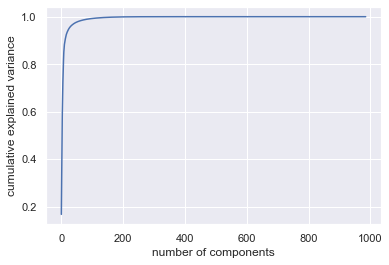

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

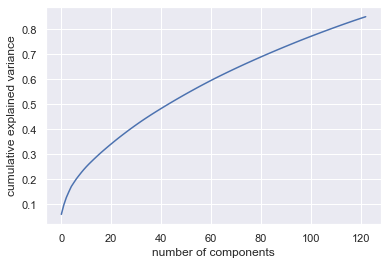

In [112]:
pca = PCA(n_components = 0.85).fit(data_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

XGBoost model accuracy score: 0.7467


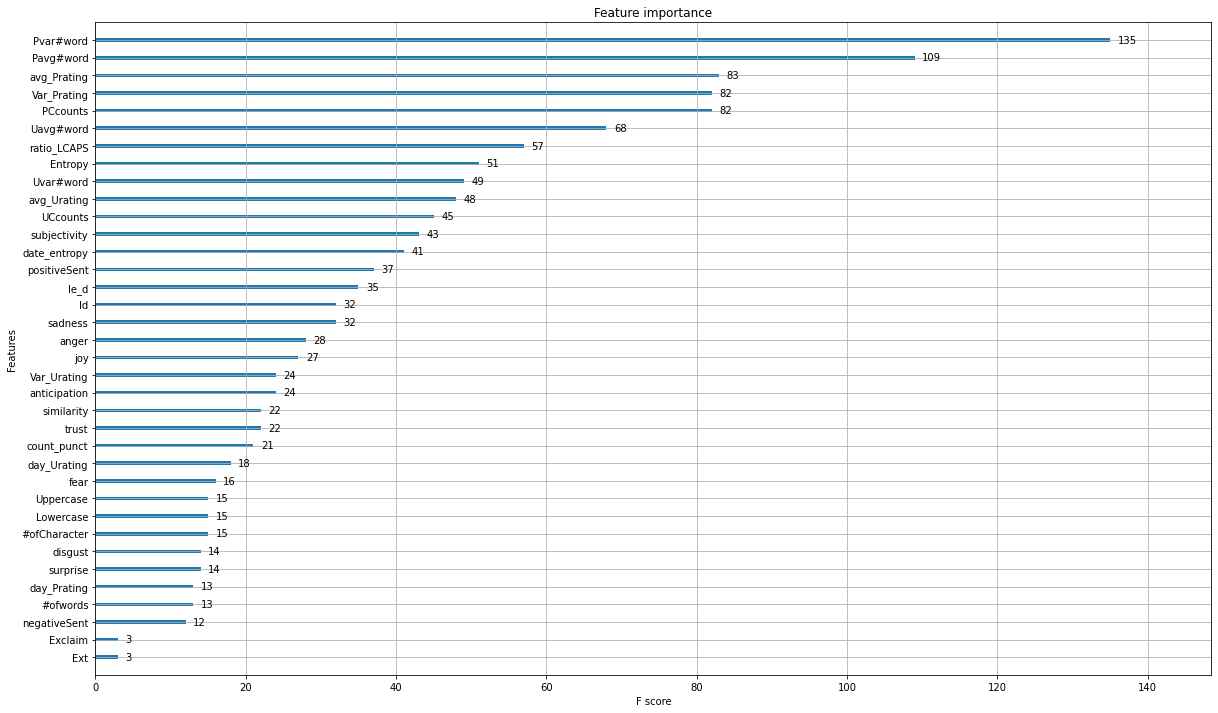

<Figure size 2880x1440 with 0 Axes>

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  
df = pd.read_csv("D:\\Yelp\\YelpNYC\\YNProcessed.csv")
y = df['label']
X = df[['avg_Urating',
       'avg_Prating', 'Var_Urating', 'Var_Prating', 'UCcounts', 'PCcounts',
       '#ofwords', 'Uavg#word', 'Uvar#word', 'Pavg#word', 'Pvar#word',
       'day_Urating', 'day_Prating', '#ofCharacter', 'Uppercase', 'Lowercase',
       'count_punct', 'Exclaim', 'subjectivity', 'positiveSent',
       'negativeSent', 'le_d', 'ld', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'Entropy', 'similarity',
       'Ext', 'singleton', 'ratio_LCAPS', 'date_entropy']].copy()


import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
plt.rcParams["figure.figsize"] = (20,12)
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (40, 20))
plt.show()

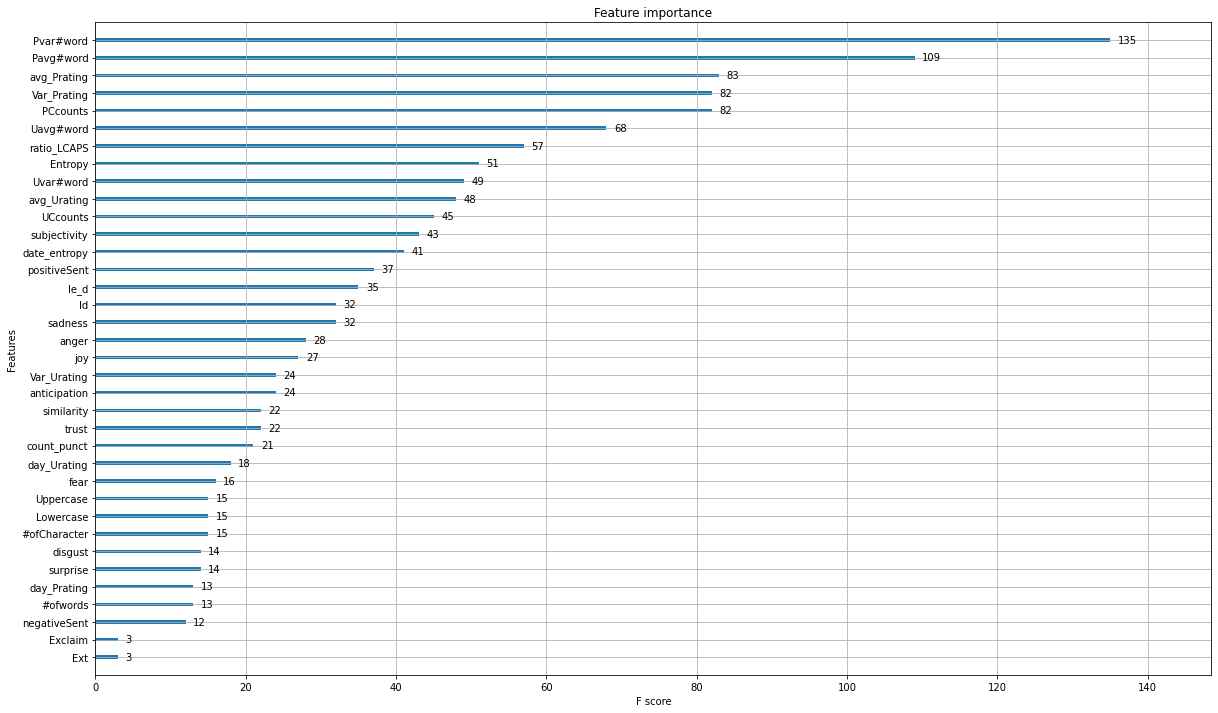

<Figure size 3600x2880 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (50, 40))
plt.show()
plt.savefig('f.jpeg')

In [13]:
df.columns

Index(['user_id', 'prod_id', 'rating', 'reviews', 'label', 'avg_Urating',
       'avg_Prating', 'Var_Urating', 'Var_Prating', 'UCcounts', 'PCcounts',
       '#ofwords', 'Uavg#word', 'Uvar#word', 'Pavg#word', 'Pvar#word',
       'day_Urating', 'day_Prating', '#ofCharacter', 'Uppercase', 'Lowercase',
       'count_punct', 'Exclaim', 'subjectivity', 'positiveSent',
       'negativeSent', 'le_d', 'ld', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'Entropy', 'similarity',
       'Ext', 'singleton', 'ratio_LCAPS', 'date', 'date_entropy'],
      dtype='object')

In [15]:
'Pavg#word', 'Pvar#word','avg_Prating', 'Var_Urating','PCcounts','Uavg#word'

<bound method NDFrame.copy of         #ofwords  #ofCharacter  Uppercase  Lowercase  count_punct  Exclaim  \
0             56           340          5        274            6        0   
1             45           228          7        170            7        0   
2             20            96          1         75            1        0   
3             12            72          2         56            3        1   
4            118           649          5        513           14        0   
...          ...           ...        ...        ...          ...      ...   
157869       114           630         10        488           18        1   
157870        83           476         15        369            9        1   
157871        23           141          3        112            4        0   
157872        86           500         12        384           14        1   
157873        99           501         16        362           18        0   

        subjectivity  positiveSen

In [2]:
df = df[['label','avg_Urating', 'avg_Prating', 'Var_Urating', 'Var_Prating', 'UCcounts',
       'PCcounts', '#ofwords', 'Uavg#word', 'Uvar#word', 'Pavg#word',
       'Pvar#word', 'day_Urating', 'day_Prating', '#ofCharacter', 'Uppercase',
       'Lowercase', 'count_punct', 'Exclaim', 'subjectivity', 'positiveSent',
       'negativeSent', 'le_d', 'ld', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'Entropy', 'similarity',
       'Ext', 'singleton', 'ratio_LCAPS', 'date', 'date_entropy']].copy()
dfH = df[df['label'] ==1]
dfS = df[df['label'] ==0]

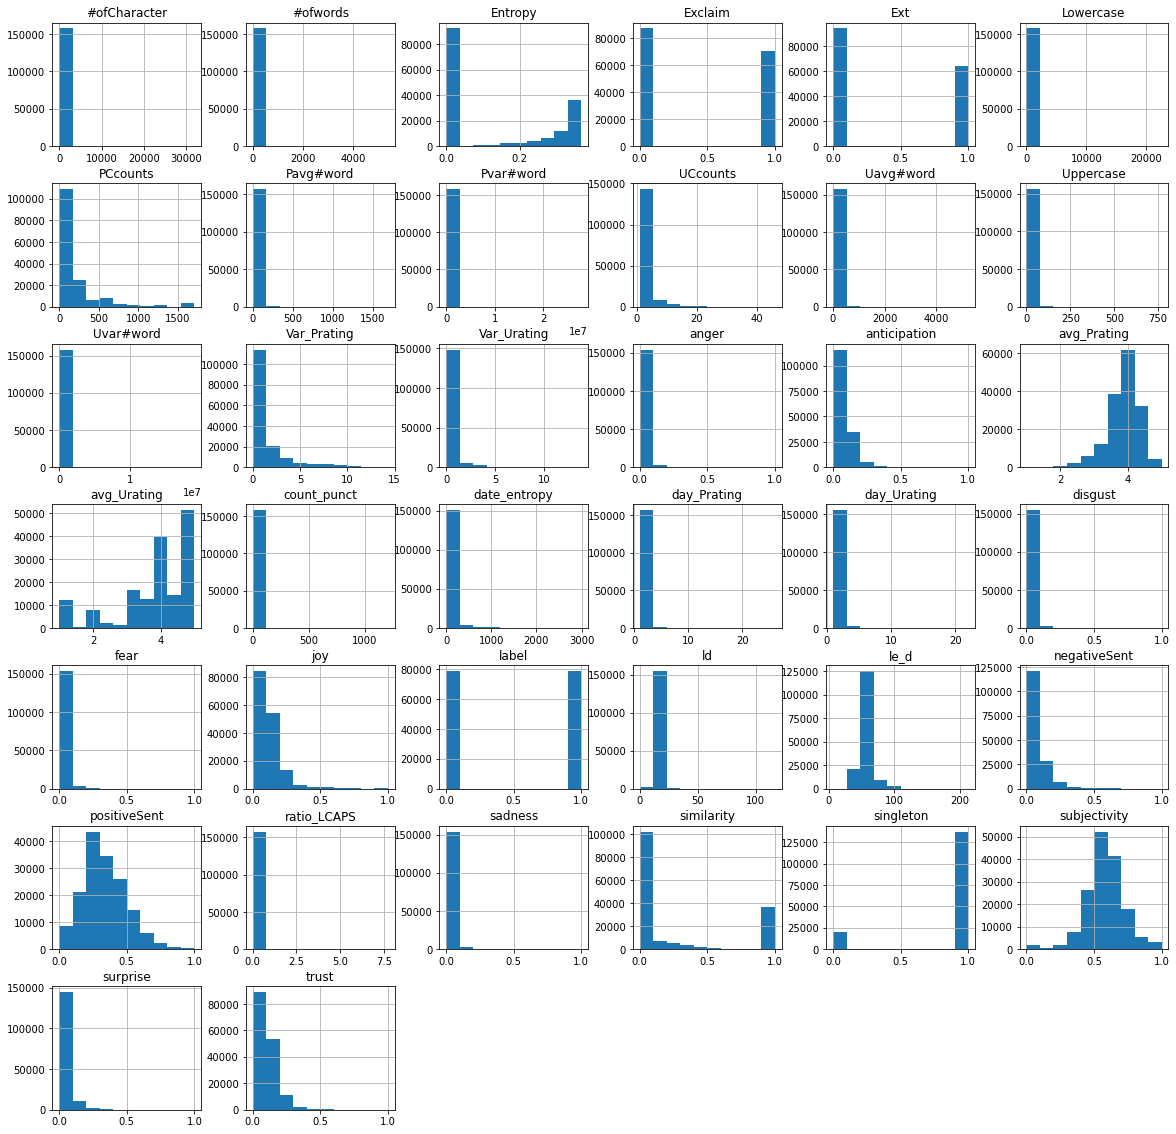

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()